In [58]:
from datetime import datetime
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn

In [38]:
class DeepNSNet(nn.Module):
    def __init__(self):
        super(DeepNSNet, self).__init__()
        self.input_length = 45
        self.fc1 = nn.Linear(self.input_length, 64)  # 6*6 from image dimension
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(8, 1)
        
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        output = self.fc5(x)
        return output

In [39]:
model = DeepNSNet()

model = torch.load('./DeepNSNet_EPOCH_059561_MAPE_0.5131.pth')
model.eval()

In [53]:
data = {}
data['train'] = pd.read_csv('../train_preprocess.csv')
data['test'] = pd.read_csv('../test_preprocess.csv')

([<matplotlib.axis.XTick at 0x1a4c752bf48>,
 <a list of 30 Text xticklabel objects>)

C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py

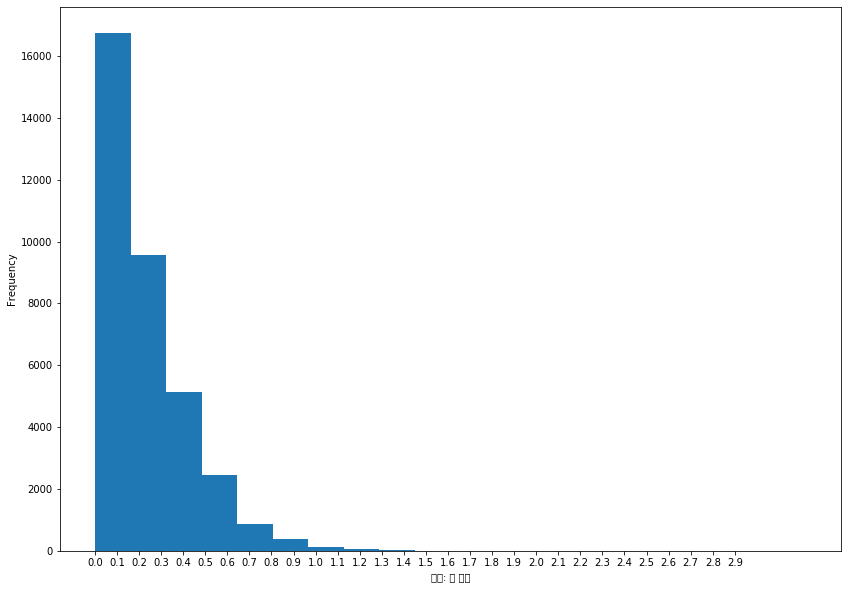

In [67]:
plt.figure(figsize=((14, 10)))
data['train'].취급액.plot(kind='hist', bins=20)
plt.xlabel('단위: 일 억원')
plt.xticks(np.arange(0, 3e+8, step=1e+7), [f'{x/1e+8:.1f}' for x in np.arange(0,3e+8, step=1e+7)])

([<matplotlib.axis.XTick at 0x1a4c7543208>,
 <a list of 30 Text xticklabel objects>)

C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\matplotlib\backends\backend_agg.py

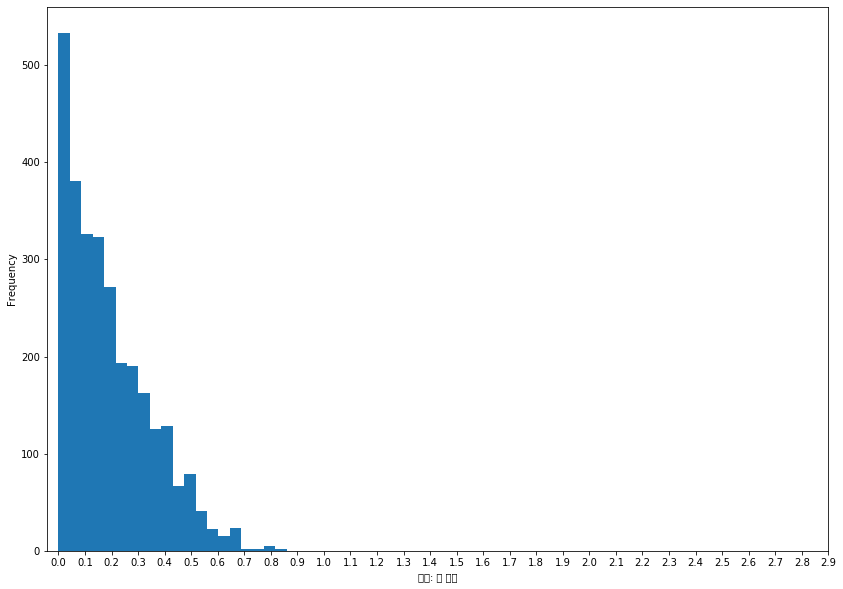

In [69]:
plt.figure(figsize=((14, 10)))
submission.취급액.plot(kind='hist', bins=20)
plt.xlabel('단위: 일 억원')
plt.xticks(np.arange(0, 3e+8, step=1e+7), [f'{x/1e+8:.1f}' for x in np.arange(0,3e+8, step=1e+7)])

In [44]:
TEST_SIZE=.2
SCALED_UNIT = 10000000
RANDOM_STATE=42
X_train, X_valid, y_train, y_valid = train_test_split(data['train'].drop('취급액', axis=1),
                                                      data['train']['취급액'] / SCALED_UNIT,
                                                      shuffle=True,
                                                      test_size=TEST_SIZE,
                                                      random_state=RANDOM_STATE)

In [46]:
mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [47]:
submission = pd.read_excel('../data/02_평가데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx',
                          skiprows=1,
                          index_col=0,
                          )
submission

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
방송일시,,,,,,,
2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
...,...,...,...,...,...,...,...
2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN


In [51]:
now = datetime.now()
file_sub_date = str(now.month).zfill(2) + str(now.day).zfill(2) + str(now.hour).zfill(2) + str(now.hour).zfill(2)
y_pred = model(torch.Tensor(mms.transform(data['test'].drop('취급액',axis=1)))).detach().numpy()
submission.loc[~submission['상품군'].str.contains('무형'),['취급액']] = np.exp(y_pred) * SCALED_UNIT
submission = submission.fillna(0)
submission.to_csv(f'../result/KUAI_{file_sub_date}_MODEL_DeepNSNet.csv', 
                  encoding='cp949')